# House Price Prediction Project

1. Problem Definition:  predict the sales price for each house and Preprocessing data
2. Feature Selection : 
	+ Choose feature to train ML model
    + Need to use Feature Enginerring to indentify Feature needed
3. Spliting the datasets
	+ `data` : dataset
    + `X` : data[`feature`]
    + `y` : target variable `SalePrice`
4. Traning Machine Learning Model

In [39]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("./data/train.csv",index_col = 'Id')# Win use \ replace for /

In [7]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Data Imputation (Missing Data Replacement)¶


In [36]:
for i in range(len(data.columns)):
    missing_data = data[data.columns[i]].isna().sum()
    perc = missing_data / len(data) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))

>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 0, percentage 0.00
>2,  missing entries: 259, percentage 17.74
>3,  missing entries: 0, percentage 0.00
>4,  missing entries: 0, percentage 0.00
>5,  missing entries: 1369, percentage 93.77
>6,  missing entries: 0, percentage 0.00
>7,  missing entries: 0, percentage 0.00
>8,  missing entries: 0, percentage 0.00
>9,  missing entries: 0, percentage 0.00
>10,  missing entries: 0, percentage 0.00
>11,  missing entries: 0, percentage 0.00
>12,  missing entries: 0, percentage 0.00
>13,  missing entries: 0, percentage 0.00
>14,  missing entries: 0, percentage 0.00
>15,  missing entries: 0, percentage 0.00
>16,  missing entries: 0, percentage 0.00
>17,  missing entries: 0, percentage 0.00
>18,  missing entries: 0, percentage 0.00
>19,  missing entries: 0, percentage 0.00
>20,  missing entries: 0, percentage 0.00
>21,  missing entries: 0, percentage 0.00
>22,  missing entries: 0, percentage 0.00
>23,  missing entries: 0, percentage 

<Axes: ylabel='Id'>

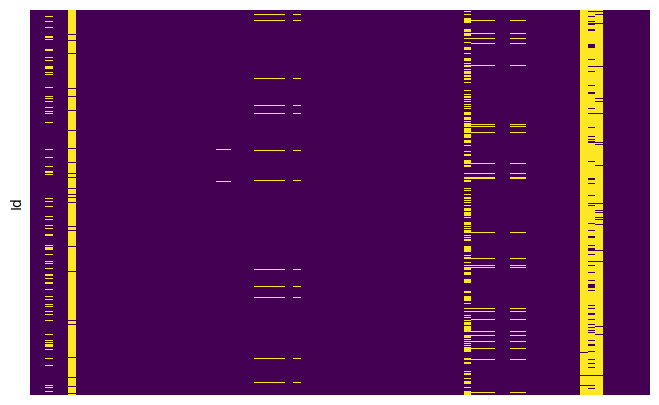

In [43]:
plt.figure(figsize=(8,5))
sns.heatmap(data.isna(),cbar = False, yticklabels = False, xticklabels = False, cmap = 'viridis')

## 2. Feature Selections


In [18]:
feature = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath" , "BedroomAbvGr", "TotRmsAbvGrd"]

## 3. Splitting dataset into X and y

In [45]:
X = data[feature]
y = data['SalePrice']
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   1stFlrSF      1460 non-null   int64
 3   2ndFlrSF      1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
dtypes: int64(7)
memory usage: 91.2 KB


### Missing values replacement (If have)

In [50]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X)
X = imputer.transform(X)
X

array([[8.450e+03, 2.003e+03, 8.560e+02, ..., 2.000e+00, 3.000e+00,
        8.000e+00],
       [9.600e+03, 1.976e+03, 1.262e+03, ..., 2.000e+00, 3.000e+00,
        6.000e+00],
       [1.125e+04, 2.001e+03, 9.200e+02, ..., 2.000e+00, 3.000e+00,
        6.000e+00],
       ...,
       [9.042e+03, 1.941e+03, 1.188e+03, ..., 2.000e+00, 4.000e+00,
        9.000e+00],
       [9.717e+03, 1.950e+03, 1.078e+03, ..., 1.000e+00, 2.000e+00,
        5.000e+00],
       [9.937e+03, 1.965e+03, 1.256e+03, ..., 1.000e+00, 3.000e+00,
        6.000e+00]])

### X,y -> X_train, y_train, X_valid, y_valid

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train,y_valid = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [53]:
X_train

array([[1.1694e+04, 2.0070e+03, 1.8280e+03, ..., 2.0000e+00, 3.0000e+00,
        9.0000e+00],
       [6.6000e+03, 1.9620e+03, 8.9400e+02, ..., 1.0000e+00, 2.0000e+00,
        5.0000e+00],
       [1.3360e+04, 1.9210e+03, 9.6400e+02, ..., 1.0000e+00, 2.0000e+00,
        5.0000e+00],
       ...,
       [8.9300e+03, 1.9780e+03, 1.3180e+03, ..., 2.0000e+00, 4.0000e+00,
        8.0000e+00],
       [3.1960e+03, 2.0030e+03, 1.5570e+03, ..., 2.0000e+00, 2.0000e+00,
        7.0000e+00],
       [1.6770e+04, 1.9980e+03, 1.1950e+03, ..., 2.0000e+00, 4.0000e+00,
        7.0000e+00]])

## 4. Traning Machine Learning Model

In [54]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=1)

In [55]:
#Fit training data into model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [56]:
y_predict = dt_model.predict(X_valid)
y_predict

array([335000., 140200., 119000., 207500., 112000.,  58500., 232600.,
       119500., 755000., 156932., 213500., 100000., 244000., 130000.,
       144900., 123000., 236000., 126000., 154500., 128000., 141500.,
       149000.,  62383., 186500., 139000., 135000., 195000.,  92000.,
       271000., 105500., 141000., 178000., 110000., 258000., 253293.,
       177000., 190000., 130000., 210000., 315750., 237500., 174000.,
       176000., 326000., 290000., 142600., 105500., 142500., 146500.,
       135000., 315750., 124000., 218000., 126000., 184000., 130000.,
       119500., 226700., 160000.,  87000., 142000.,  55993., 140000.,
       155000., 290000., 174000.,  97000., 205950., 147000., 207500.,
       176000., 109000., 139000., 194500., 115000., 230000., 132500.,
       109500., 325300.,  90000., 135960., 134900., 127000., 147000.,
       197000., 194700.,  86000., 202500., 198900.,  60000., 188000.,
       177000., 174000., 238000., 206000.,  80000., 190000., 223500.,
        88000., 1350

In [57]:
pd.DataFrame({'y' : y_valid, 'y_predict' : y_predict})

,y,y_predict
Id,,
530,200624,335000.0
492,133000,140200.0
460,110000,119000.0
280,192000,207500.0
656,88000,112000.0
...,...,...
327,324000,260400.0
441,555000,451950.0
1388,136000,107500.0


In [58]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [59]:
rf_predict =  rf_model.predict(X_valid)
rf_predict

array([271690.        , 155039.        , 122024.        , 188915.        ,
        91147.        ,  88533.2       , 240518.24      , 126286.        ,
       624269.12      , 174312.25333333, 209138.46      , 147714.5       ,
       233088.25      , 123139.5       , 140503.75      , 139187.        ,
       232538.3       , 134260.        , 145952.24      , 130562.05      ,
       129304.53      , 147179.68333333, 112355.46      , 183320.22      ,
       153926.5       , 182853.57      , 176891.        ,  86320.        ,
       308784.98      , 112746.        , 141734.5       , 190094.        ,
       124460.65      , 280081.94      , 317780.6       , 179756.65      ,
       218512.64      , 118609.16      , 224329.28      , 304517.56      ,
       229449.        , 141422.15333333, 186872.35      , 302902.86      ,
       316105.83      , 139820.        , 105783.66      , 127933.25      ,
       165361.5       , 118615.5       , 314806.34      , 145952.75      ,
       168104.74      , 1

### Predict with a new inout

In [60]:
rf_model.predict([[6969,2021,1000,800,4,5,8]])

array([206158.4])

## 5. Model Evaluation